# (sFigure1)-Characterization of the Gastric Mucosal Microenvironment by ScRNA-seq.

In [2]:
import omicverse as ov 
import scanpy as sc
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

2024-02-25 19:54:30.482342: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-25 19:54:30.606367: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-25 19:54:31.322281: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/slurm/lib:/opt/slurm/lib/slurm:/opt/slurm/lib:/opt/slurm/lib/slurm:/opt/slurm/lib:


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.5.8, Tutorials: https://omicverse.readthedocs.io/


In [3]:
# 字体设置
import os
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties

font_path = 'Gastric/Arial.ttf'
front_prop = FontProperties(fname=font_path)


In [4]:
sc_color=['#7CBB5F',
 '#368650',
 '#A499CC',
 '#5E4D9A',
 '#78C2ED',
 '#866017',
 '#9F987F',
 '#E0DFED',
 '#EF7B77',
 '#279AD7',
 '#F0EEF0',
 '#1F577B',
 '#A56BA7',
 '#E0A7C8',
 '#E069A6',
 '#941456',
 '#FCBC10',
 '#EAEFC5',
 '#01A0A7',
 '#75C8CC',
 '#F0D7BC',
 '#D5B26C',
 '#D5DA48',
 '#B6B812',
 '#9DC3C3',
 '#A89C92',
 '#FEE00C',
 '#FEF2A1']

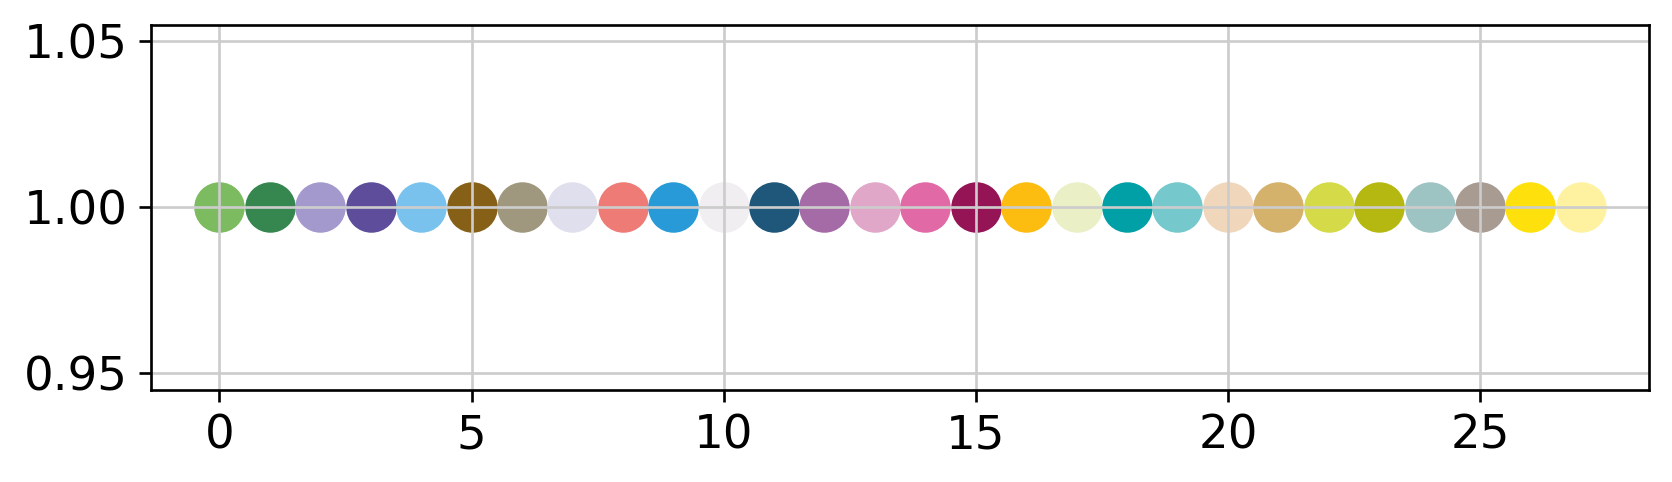

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 2))
for i in range(len(sc_color)):
    plt.scatter(i, 1, c=sc_color[i], s=200)
plt.show()

In [6]:
adata = sc.read_h5ad("Gastric/Data/Gastric_anno.h5ad")
#adata = adata[adata.obs['total_counts']<adata.obs['total_counts'].quantile(0.99)]
adata

AnnData object with n_obs × n_vars = 63398 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

# Batch

In [7]:
sorted(list(set(adata.obs['Person'])))

['Neg_1',
 'Neg_2',
 'Neg_3',
 'Para_1',
 'Para_2',
 'Pos_1',
 'Pos_2',
 'Pos_3',
 'Pos_4',
 'Pos_5',
 'Pos_6']

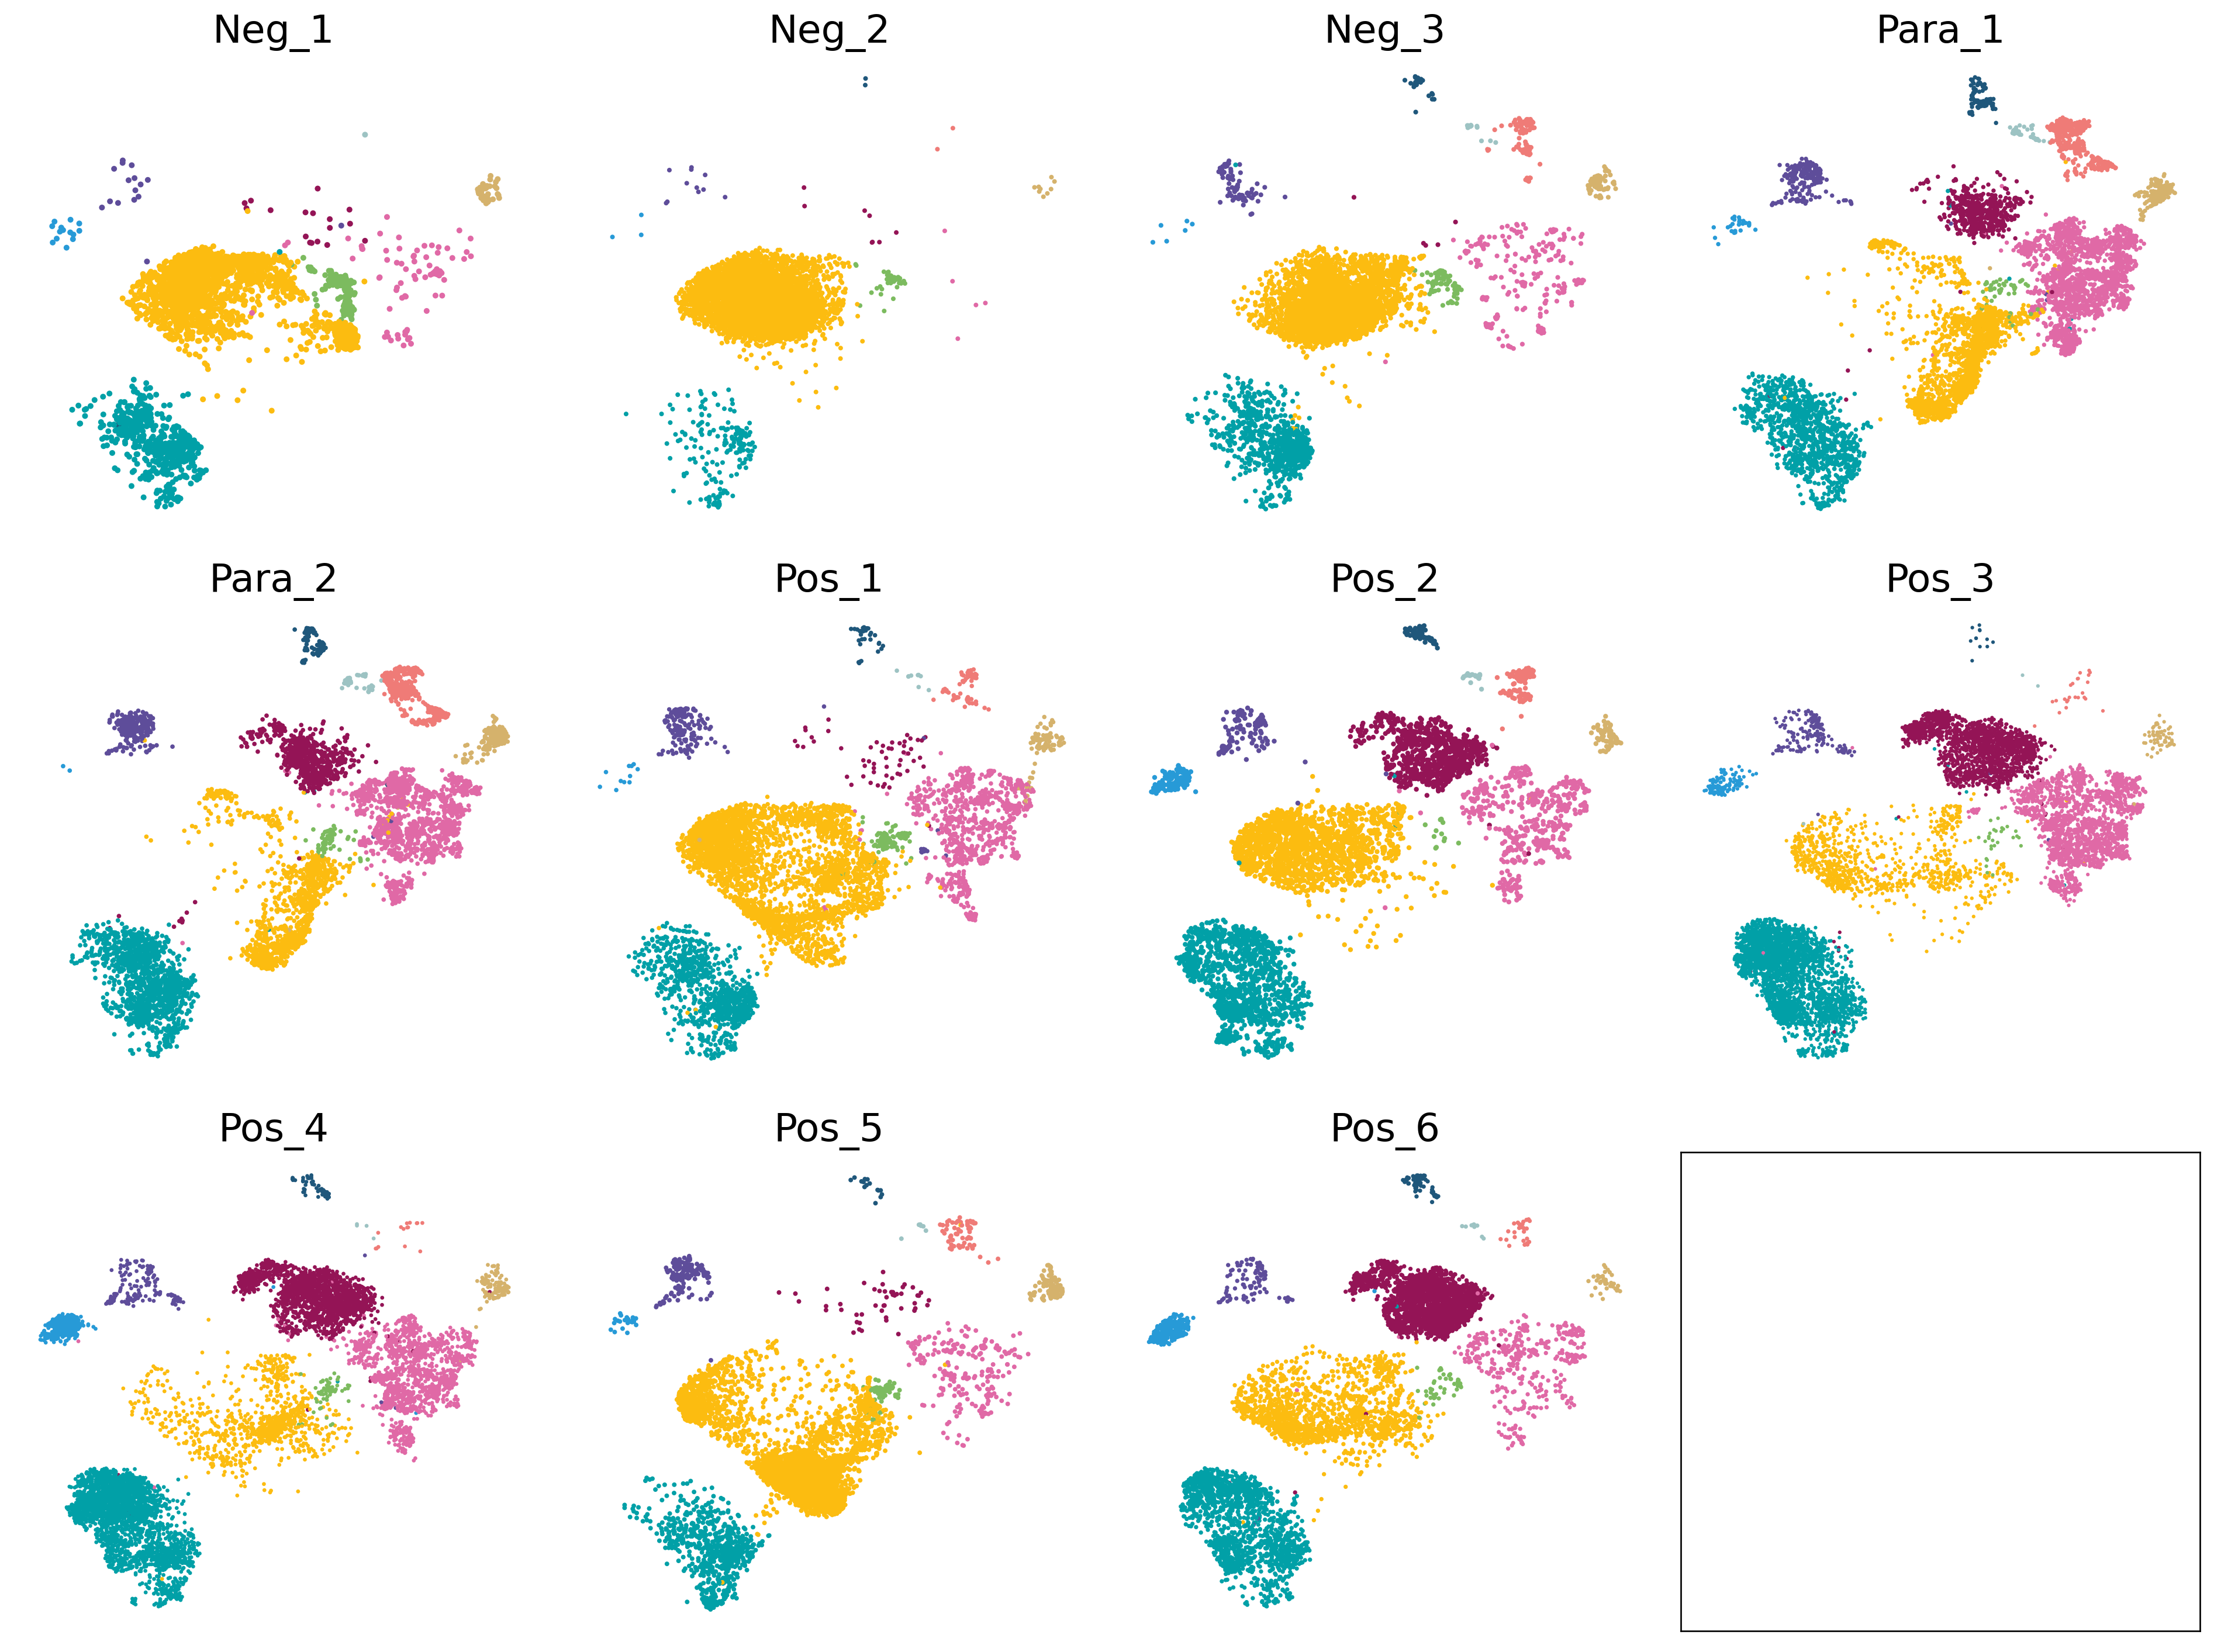

In [8]:
import matplotlib.pyplot as plt

# 创建3行4列的子图网格，但只绘制前11个子图
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12), sharex=True, sharey=True)

# 每个子图的示例代码
for i, row_axes in enumerate(axes):
    for j, ax in enumerate(row_axes):
        # 绘制前11个子图，第12个子图不绘制
        if i * 4 + j < 11:
            axes = ov.utils.embedding(adata[adata.obs['Person']==sorted(list(set(adata.obs['Person'])))[i * 4 + j]],
                               basis='X_umap',
                               color=['major_celltype'],
                               title=sorted(list(set(adata.obs['Person'])))[i * 4 + j],
                               frameon=False,
                               show=False,
                               legend_loc=False,
                               ax=ax)
            axes.set_title(sorted(list(set(adata.obs['Person'])))[i * 4 + j],fontdict={'size':20})


# 调整子图之间的间距
plt.tight_layout()
# 显示图形
plt.savefig('Gastric/Figure/sFigure1/sFigure1_A.png', dpi=300)
plt.show()


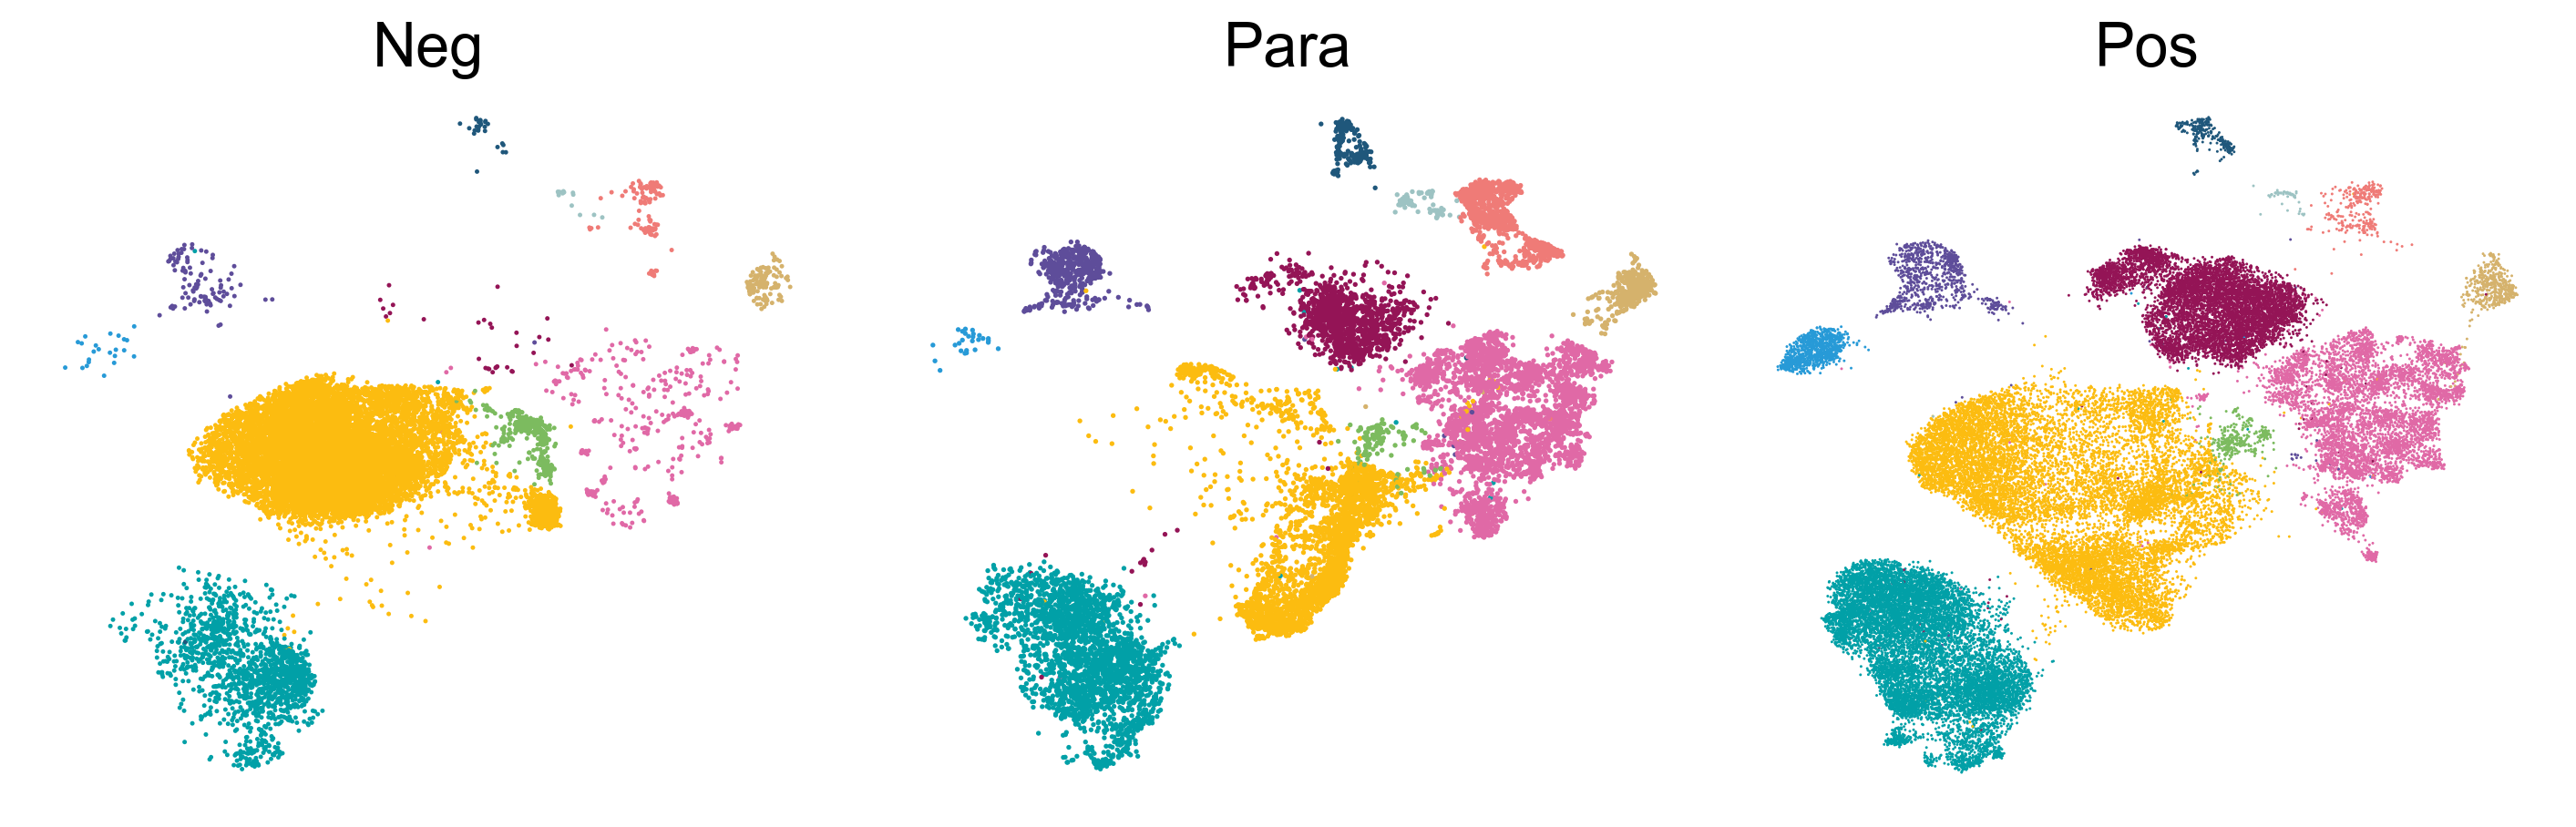

In [36]:
import matplotlib.pyplot as plt

# 创建3行4列的子图网格，但只绘制前11个子图
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharex=True, sharey=True)

# 每个子图的示例代码
for j, ax in enumerate(axes):
    # 在循环中仅绘制三个子图
    axes = ov.utils.embedding(adata[adata.obs['Sample']==sorted(list(set(adata.obs['Sample'])))[j]],
                               basis='X_umap',
                               color=['major_celltype'],
                               title=sorted(list(set(adata.obs['Sample'])))[j],
                               frameon=False,
                               show=False,
                               legend_loc=False,
                               ax=ax)
    axes.set_title(sorted(list(set(adata.obs['Sample'])))[j],fontdict={'size':20})

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.savefig('Gastric/Figure/sFigure1/sFigure1_B.png', dpi=300)

plt.show()


In [27]:
axes

<AxesSubplot: title={'center': 'Neg'}, xlabel='X_umap1', ylabel='X_umap2'>

In [16]:
adata_raw = adata.raw.to_adata()
adata_raw

AnnData object with n_obs × n_vars = 63398 × 32559
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

In [17]:
adata.obs['Number of transcripts'] = adata.obs['total_counts'] 
adata.obs['Number of genes'] = adata.obs['n_genes_by_counts'] 
adata.obs['Sample type'] = adata.obs['Sample']

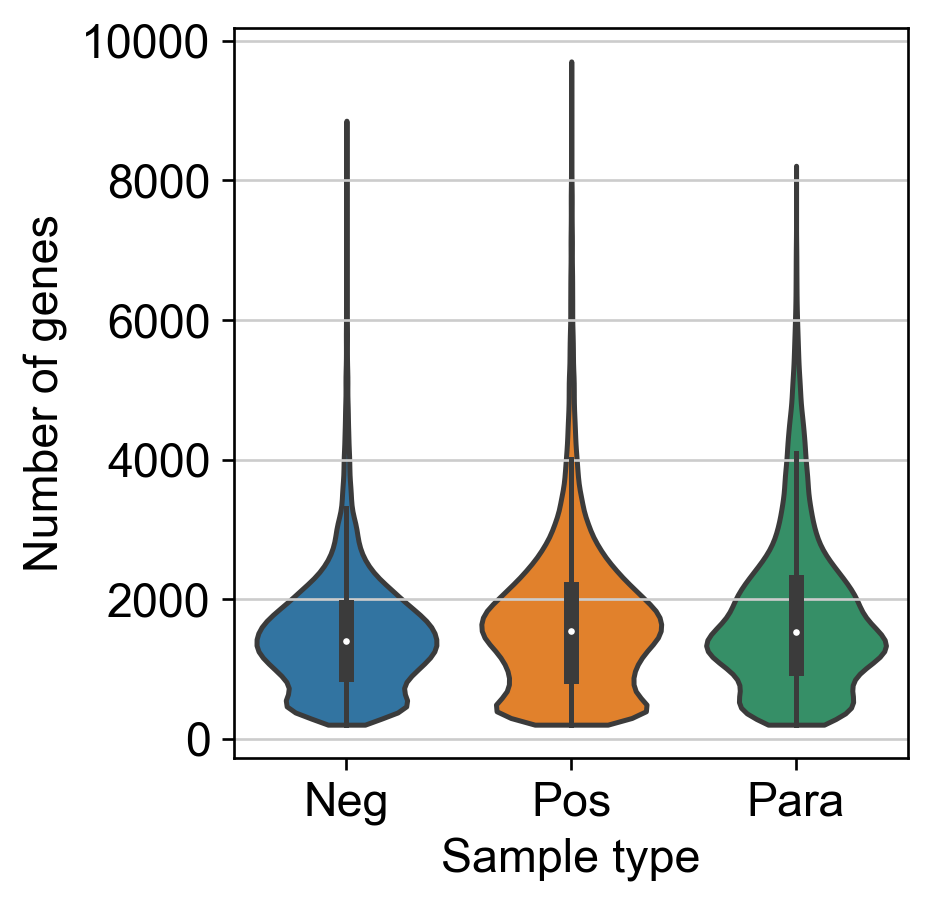

In [18]:
from matplotlib.pyplot import rc_context

with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.violin(adata, ['Number of genes'], groupby='Sample type', stripplot=False, inner='box',show=False)
plt.savefig('/storage/zengjianyangLab/hulei/Gastric/Figure/sFigure1/sFigure1_C.png', dpi=300)


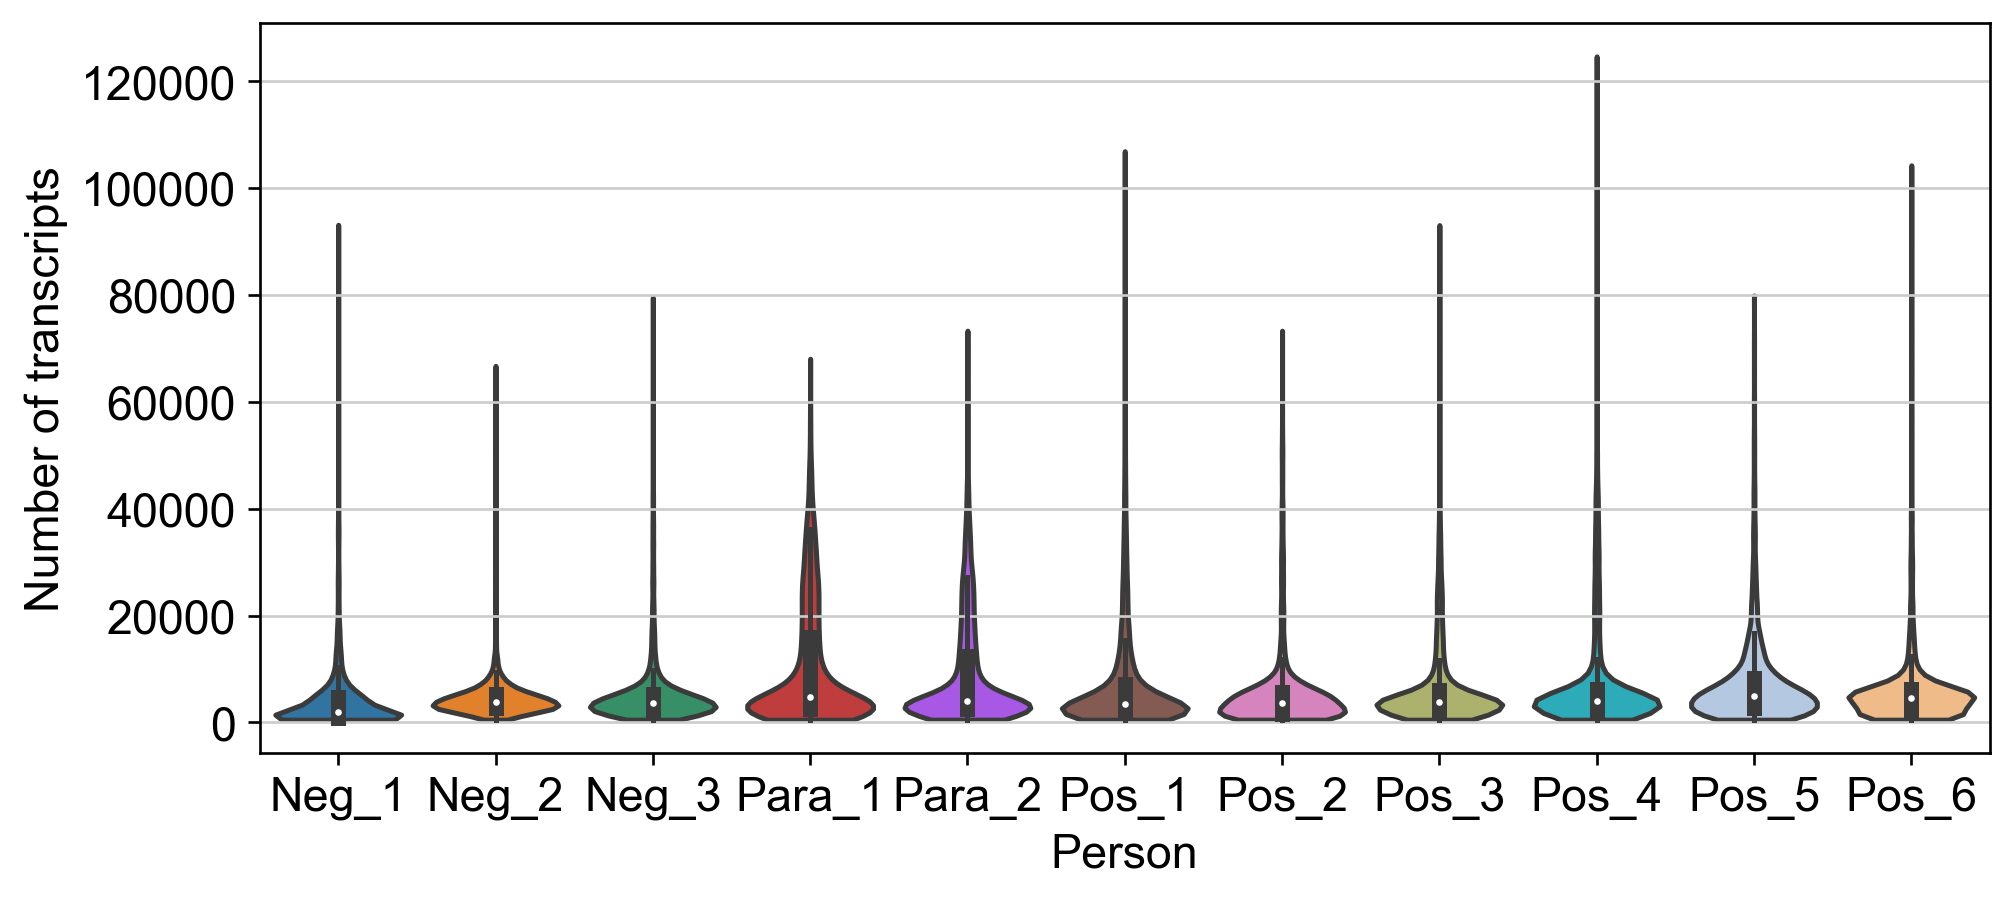

In [19]:
with rc_context({'figure.figsize': (8, 4)}):
    sc.pl.violin(adata, ['Number of transcripts'], groupby='Person', stripplot=False, inner='box',show=False)
plt.savefig('Gastric/Figure/sFigure1/sFigure1_D.png', dpi=300)
